<a href="https://colab.research.google.com/github/seyoung911/ClearWater/blob/master/assignment04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import csv

with open('/content/drive/My Drive/Colab Notebooks/data_train.csv', newline='') as myfile:
    trainList  = list(csv.reader(myfile, delimiter=','))
    ct = 1 
    print(trainList)
    #for i in trainList:
        #print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        #ct += 1

'''with open('/content/drive/My Drive/Colab Notebooks/data_test.csv', newline='') as myfile:
    testList = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in testList:
       print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
       ct += 1'''


[['0.273547715', '-8.932101598', '18.70868394', '73.57882491'], ['5.403327323', '4.782976501', '-18.76220986', '-56.41043334'], ['0.029941313', '-3.245915698', '6.932498211', '52.39076825'], ['3.047974458', '0.715210711', '-1.965418717', '-6.936295282'], ['1.302074319', '-5.871807382', '-15.70218135', '-34.99701708'], ['0.480677688', '-2.911761988', '-2.363123536', '-19.85473504'], ['1.631502074', '9.399052249', '2.475479911', '4.669308903'], ['6.373997103', '16.58421457', '17.89625324', '20.32729691'], ['7.00314061', '17.42538918', '-11.9219527', '-96.11724036'], ['11.81639397', '10.21477931', '9.041430522', '29.87851202'], ['6.927811569', '0.784366081', '9.930817926', '42.21994908'], ['14.65597238', '12.20541314', '20.88311485', '88.95764271'], ['11.93798648', '11.01635662', '16.5510478', '48.77575822'], ['15.54985687', '11.39777228', '17.25657149', '66.50231593'], ['14.94482857', '19.38957377', '3.021518392', '-6.167810257'], ['14.57237834', '23.16596016', '14.97949627', '15.4972478

"with open('/content/drive/My Drive/Colab Notebooks/data_test.csv', newline='') as myfile:\n    testList = csv.reader(myfile, delimiter=',')\n    ct = 1 \n    for i in testList:\n       print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])\n       ct += 1"

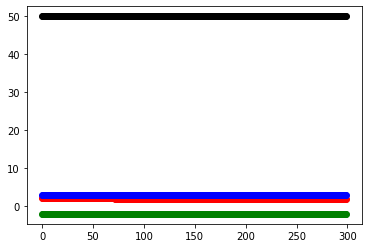

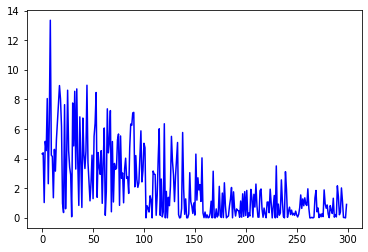

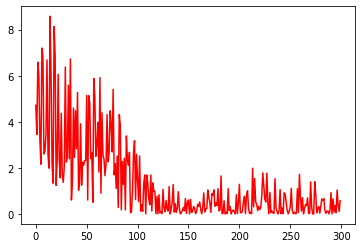

In [158]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import random

trainingNum = 300

x_data = []
y_data = []
z_data = []
h_data = []

Hypo = []
cost_list = []
w1_list = []
w2_list = []
w3_list = []
w0_list = []

dw1_list = []
dw2_list = []
dw3_list = []
dw0_list = []

# training data set  받아와서 x y z h 배열로 각각 구분해서 float으로 변환해 값 넣어줌
for i in range(trainingNum) :
  x_data.append(float(trainList[i][0]))
  y_data.append(float(trainList[i][1]))
  z_data.append(float(trainList[i][2]))
  h_data.append(float(trainList[i][3]))


# Building the model
w1 = 2.0
w2 = -2.0
w3 = 3.0
w0 = 50.0

L = 0.00005  # The learning Rate

n = float(len(x_data)) # Number of elements in X

# cost function 함수 작성
def calculate_mse(w0, w1, w2, w3, xdata, ydata, zdata, hdata): 
    h_pred = w0 + w1 * xdata + w2* ydata + w3* zdata 
    error = h_pred - hdata
    sse = np.sum(error ** 2)
    return ((1 / (2 * len(x_data))) * sse)


# ************Gradient Discent 직접 구현해야함. 여기에서 자구 type 에러뜸

for i in range(trainingNum):
    cost_list.append(calculate_mse(w0, w1, w2, w3, x_data[i], y_data[i], z_data[i], h_data[i]))

    h_pred = w1 * x_data[i] + w2* y_data[i]+ w3 * z_data[i] + w0  # The current predicted value of Y
    dw1_list.append(x_data[i] * (h_pred - h_data[i]) * (1/n))  #  **********float 은 iterable하지않다?***질문
    dw2_list.append(y_data[i] * (h_pred - h_data[i]) * (1/n))
    dw3_list.append(z_data[i] * (h_pred - h_data[i]) * (1/n))
    dw0_list.append((h_pred - h_data[i]) *(1/n)) # 변화량
    w1_list.append(w1 - L * dw1_list[i]) # w1 업데이트
    w2_list.append(w2 - L * dw2_list[i])
    w3_list.append(w3 - L * dw3_list[i])
    w0_list.append(w0 - L * dw0_list[i]) #  c 업데이트
    w1 = (w1 - L * dw1_list[i])
    w2 = (w2 - L * dw2_list[i])
    w3 = (w3 - L * dw3_list[i])
    w0 = (w0 - L * dw0_list[i])

list_test = []
result_test = []
plt.scatter([i for i in range(len(w0_list))],w0_list,color='black')
plt.scatter([i for i in range(len(w1_list))],w1_list,color='red')
plt.scatter([i for i in range(len(w2_list))],w2_list,color='green')
plt.scatter([i for i in range(len(w3_list))],w3_list,color='blue')
plt.show()

plt.plot([i for i in range(len(cost_list))], cost_list, c = 'b')
plt.show()

train_cost_list = []
train_dw1_list = []
train_dw2_list = []
train_dw3_list = []
train_dw0_list = []
train_w1_list = []
train_w2_list = []
train_w3_list = []
train_w0_list = []
x_data = []
y_data = []
z_data = []
h_data = []
with open('/content/drive/My Drive/Colab Notebooks/data_test.csv', newline='') as myfile:
    testList = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in testList:
       i = [float(_) for _ in i] 
       x_data.append(i[0])
       y_data.append(i[1])
       z_data.append(i[2])
       h_data.append(i[3])
       ct += 1

for i in range(trainingNum):
    train_cost_list.append(calculate_mse(w0, w1, w2, w3, x_data[i], y_data[i], z_data[i], h_data[i]))

    train_h_pred =  w1 * x_data[i] + w2* y_data[i]+ w3 * z_data[i] + w0  # The current predicted value of Y
    train_dw1_list.append(x_data[i] * (train_h_pred - h_data[i]) * (1/n))  #  **********float 은 iterable하지않다?***질문
    train_dw2_list.append(y_data[i] * (train_h_pred - h_data[i]) * (1/n))
    train_dw3_list.append(z_data[i] * (train_h_pred - h_data[i]) * (1/n))
    train_dw0_list.append((train_h_pred - h_data[i]) *(1/n)) # 변화량
    train_w1_list.append(w1 - L * dw1_list[i]) # w1 업데이트
    train_w2_list.append(w2 - L * dw2_list[i])
    train_w3_list.append(w3 - L * dw3_list[i])
    train_w0_list.append(w0 - L * dw0_list[i]) #  c 업데이트
    w1 = (w1 - L * train_dw1_list[i])
    w2 = (w2 - L * train_dw1_list[i])
    w3 = (w3 - L * train_dw1_list[i])
    w0 = (w0 - L * train_dw1_list[i])

plt.plot([i for i in range(len(train_cost_list))], train_cost_list, color = 'red')
#plt.plot([i for i in range(len(result_test))], result_test, color ='black')
plt.show()

